In [4]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from src.basic_model import DK_model

## Stability of Equilibria in the Rumor Model

We analyze the equilibria of the system:


\begin{aligned}
\frac{dI}{dt} &= -\beta I S \\
\frac{dS}{dt} &= \beta I S - \gamma S(S + R) \\
\frac{dR}{dt} &= \gamma S(S + R)
\end{aligned}


The equilibrium set is given by:


$S = 0, \quad I + R = 1$


We compute the Jacobian matrix at an arbitrary point $(I^*, 0, R^*)$, and find the eigenvalues:


$\lambda_1 = 0, \quad \lambda_2 = 0, \quad \lambda_3 = \beta I^* - \gamma(1 - I^*)$


The system is transversely stable if:


$\lambda_3 = \beta I^* - \gamma(1 - I^*) < 0 \Rightarrow I^* < \frac{\gamma}{\beta + \gamma}$

In [5]:
def compute_lambda3(beta, gamma, I_star):
    """Compute the transverse eigenvalue at equilibrium (I_star, 0, 1 - I_star)."""
    return beta * I_star - gamma * (1 - I_star)

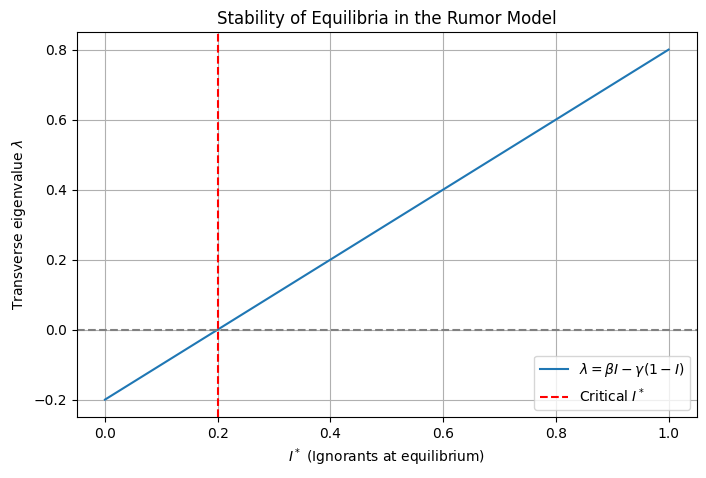

In [6]:
beta = 0.8
gamma = 0.2
I_vals = np.linspace(0, 1, 200)
lambda_vals = [compute_lambda3(beta, gamma, I) for I in I_vals]

plt.figure(figsize=(8, 5))
plt.plot(I_vals, lambda_vals, label=r"$\lambda = \beta I - \gamma (1 - I)$")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(gamma / (beta + gamma), color='red', linestyle='--', label="Critical $I^*$")
plt.xlabel("$I^*$ (Ignorants at equilibrium)")
plt.ylabel("Transverse eigenvalue $\lambda$")
plt.title("Stability of Equilibria in the Rumor Model")
plt.legend()
plt.grid(True)
plt.show()

## Summary

This plot shows that the transverse stability of the equilibrium depends on the proportion of Ignorants.

- If $ I^* < \gamma / (\beta + \gamma) $, the equilibrium is **stable** (the rumor dies out).
- If $ I^* > \gamma / (\beta + \gamma) $, the equilibrium is **unstable** (rumor may spread again).

This confirms that the final outcome depends both on the parameters and the initial condition.
